# **REGRESSÃO MÚLTIPLA**
---
---

Este é um caderno de exercícios de modelos de regressão do curso de ciência de dados da EBAC.

O objetivo é a demonstração de conhecimentos a cerca de modelos de regressão com múltiplas variáveis explicativas.

Assim como, a desmonstração de habilidade para o tratamento de dados, aplicar operações matemáticas no ajuste de modelo afim de obter um gráfico de dispersão mais uniforme e independente possível, e com um melhor coeficiente de determinação (R²).

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

Utilizando a base de dados de gorjeta do seaborn, onde acrescentamos duas variáveis novas:
* `tip_pct`: porcentagem da gorjeta na conta total.
* `net_bill`: total da conta sem incluir a gorjeta.

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [3]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'net_bill'],
      dtype='object')

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:
#1)
#Utilizando o método .dmatrices
y, x  = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
x

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

A feature `dinner` está na variável `time`, onde o Patsy irá tranformar já em dummie.

In [5]:
#2)
#Treinando o modelo e visualizando summary
reg_tip = sm.OLS(y, x)
reg_tip = reg_tip.fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.64e-20
Time:                        23:49:49   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o atributo `P>|t|`, temos que as variáveis insignificantes são a variável `time` e a variável `sex`, pois ambos possuem mais de 50% de insignificância.

In [6]:
#Refazendo o modelo
y, x  = patsy.dmatrices('tip ~ smoker + net_bill', tips)
reg_tip = sm.OLS(y, x)
reg_tip = reg_tip.fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 06 May 2024   Prob (F-statistic):           4.56e-22
Time:                        23:49:49   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é de 0.3348913546772815


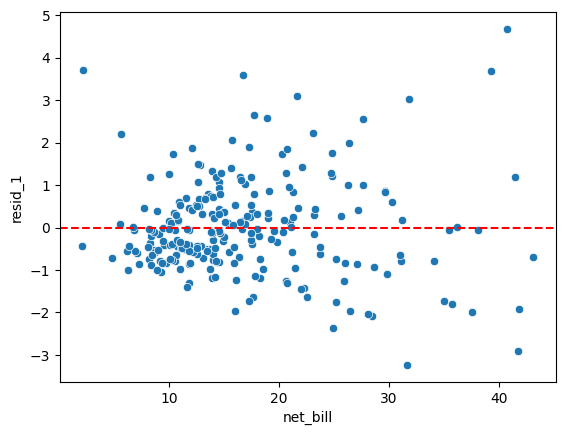

In [7]:
#3)
#Salvando esses resíduos
tips['resid_1'] = reg_tip.resid
#Gráfico
sns.scatterplot(x='net_bill', y='resid_1', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

print(f'O R² é de {reg_tip.rsquared}')

Existe um padrão cônico no gráfico dos resíduos, significando que dá para melhorar.

O R² é de 0.3363545286688928


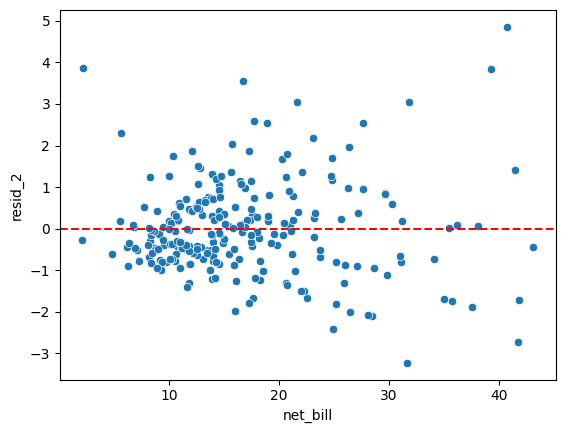

In [8]:
#4)
#Modelo com Netbill com polinômio:
y, x  = patsy.dmatrices('tip ~ net_bill + I(net_bill**2) + smoker', tips)
reg_tip = sm.OLS(y, x)
reg_tip = reg_tip.fit()

#Gráfico dos Resíduos
tips['resid_2'] = reg_tip.resid
sns.scatterplot(x='net_bill', y='resid_2', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

#R2 do modelo
print(f'O R² é de {reg_tip.rsquared}')

O R² continua praticamente o mesmo, e o padrão cônico ainda permanece

O R² é de 0.29467323673044776


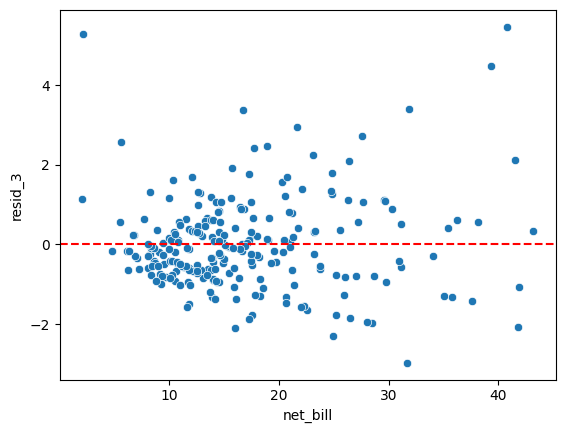

In [9]:
#Modelo com o Netbill no log
y, x = patsy.dmatrices('tip ~ np.log(net_bill) + smoker', tips)
reg_tip = sm.OLS(y, x)
reg_tip = reg_tip.fit()

#Gráfico dos Resíduos
tips['resid_3'] = reg_tip.resid
sns.scatterplot(x='net_bill', y='resid_3', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

#R2
print(f'O R² é de {reg_tip.rsquared}')

O R² piorou. Logo o melhor modelo foi o de polinômio na variável `net_bill` com 33,63%.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
#1)
#Criando as matrizes
y, x = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
x

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [11]:
#2)
#Criando o modelo
reg_tip_2 = sm.OLS(y, x)
reg_tip_2 = reg_tip_2.fit()
reg_tip_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.21e-18
Time:                        23:49:51   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As variáveis insignificantes são `sex` e `time`, pois possuem o parâmetro `P>|t|` maior do que 50%.

In [12]:
#Refazendo o modelo
y,x = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)
reg_tip_2 = sm.OLS(y, x)
reg_tip_2 = reg_tip_2.fit()
reg_tip_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.31e-20
Time:                        23:49:51   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é de 0.32456137450016975


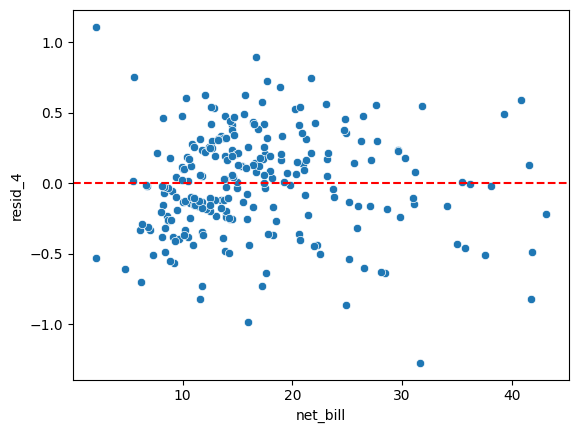

In [13]:
#3)
#salvando os resíduos
tips['resid_4'] = reg_tip_2.resid
#Gráfico
sns.scatterplot(x='net_bill', y='resid_4', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
#R²
tips['pred_tip'] = np.exp(reg_tip_2.predict())
R2 = tips['pred_tip'].corr(tips['tip'])**2
print(f'O R² é de {R2}')

O R² é de 0.3349643382567273


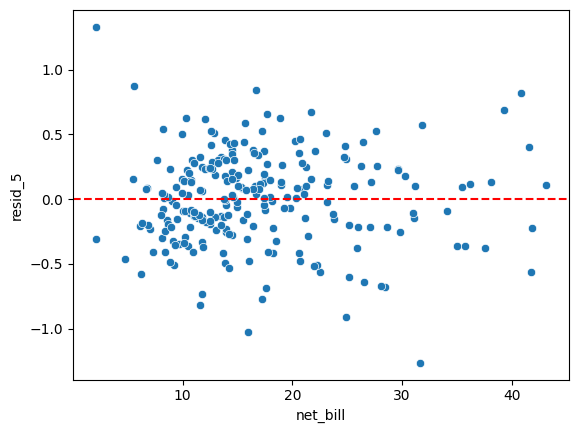

In [14]:
#4)
#Refazendo as matrizes para o polinomio
y,x = patsy.dmatrices('np.log(tip) ~ net_bill + np.power(net_bill,2) + smoker', tips)
reg_tip_2 = sm.OLS(y, x)
reg_tip_2 = reg_tip_2.fit()

#Salvando o resíduo
tips['resid_5'] = reg_tip_2.resid
#Gráfico
sns.scatterplot(x='net_bill', y='resid_5', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
#R²
tips['pred_tip'] = np.exp(reg_tip_2.predict())
R2 = tips['pred_tip'].corr(tips['tip'])**2
print(f'O R² é de {R2}')

O R² é de 0.33156133095688445


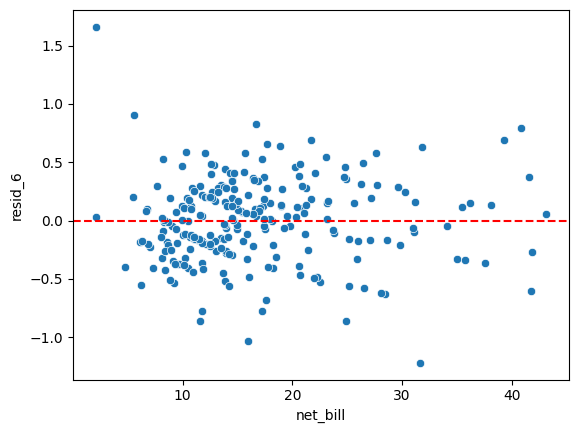

In [15]:
#Refazendo as matrizes para o log
y,x = patsy.dmatrices('np.log(tip) ~ np.log(net_bill) + smoker', tips)
reg_tip_2 = sm.OLS(y, x)
reg_tip_2 = reg_tip_2.fit()

#Salvando o resíduo
tips['resid_6'] = reg_tip_2.resid
#Gráfico
sns.scatterplot(x='net_bill', y='resid_6', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
#R²
tips['pred_tip'] = np.exp(reg_tip_2.predict())
R2 = tips['pred_tip'].corr(tips['tip'])**2
print(f'O R² é de {R2}')

O melhor modelo foi o que utilizou polinômio em `net_bill`, com 33,49% contra 32,45% do item 1.

5) Comparando os dois tópicos, o melhor modelo foi a do tópico 1 com 33,63%, que apenas fizemos uma tranformada de polinômio na variável `net_bill`.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [16]:
df = pd.read_csv('previsao_de_renda.csv')

In [17]:
#dropando todas os missing
df.dropna(inplace=True)

In [18]:
#1)
#Ajustando o modelo
y, x = patsy.dmatrices('renda ~ tempo_emprego', df)
reg_renda = sm.OLS(y, x)
reg_renda = reg_renda.fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        23:49:52   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

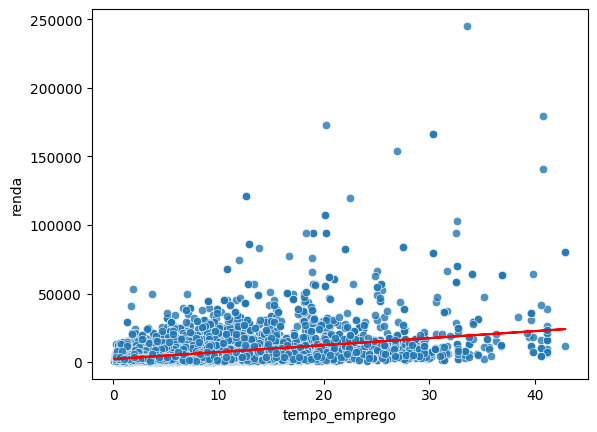

In [19]:
#Gráfico da regressão
sns.scatterplot(x='tempo_emprego', y='renda', data=df, alpha = 0.8)
plt.plot(df['tempo_emprego'], reg_renda.predict(), color='r')

O R² é de 0.14823474099481704


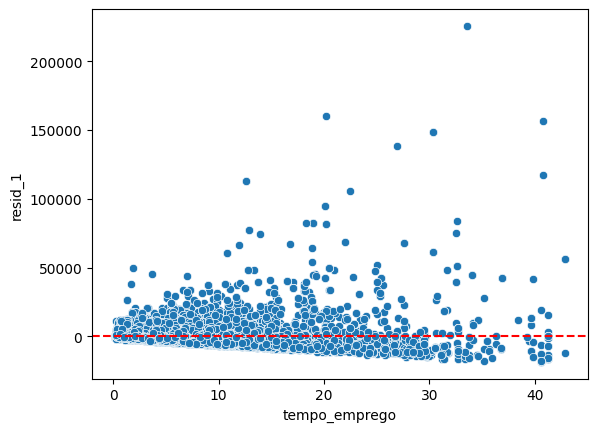

In [20]:
#2)
#Gráfico dos resíduos
df['resid_1'] = reg_renda.resid
sns.scatterplot(x='tempo_emprego', y='resid_1', data=df)
plt.axhline(y=0, color='r', linestyle='--')

#R²
print(f'O R² é de {reg_renda.rsquared}')

Os erros estão muito pouco diversos, há um padão cônico também. Para fazer esse tratamento talvez o melhor seja tranformar a vairável resposta para log no treinamento.

In [21]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'resid_1'],
      dtype='object')

In [22]:
#3)
#Ajustado um modelo com todas as variáveis
y, x = patsy.dmatrices('renda ~ tempo_emprego + posse_de_veiculo + sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', df)
reg_renda = sm.OLS(y, x)
reg_renda = reg_renda.fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        23:49:54   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

In [23]:
#4)
#Mantendo só as variáveis significantes
y, x = patsy.dmatrices('np.log(renda) ~ sexo + tempo_emprego + qtd_filhos + idade + qt_pessoas_residencia',df)
reg_renda = sm.OLS(y, x)
reg_renda = reg_renda.fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1300.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        23:49:55   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.741e+04
Df Residuals:                   12421   BIC:                         2.746e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2878      0.043    169.701      0.000       7.204       7.372
sexo[T.M]                 0.7852      0.014     56.532      0.000       0.758       0.812
tempo_emprego             0.0607      0.001     58.746      0.000       0.059       0.063
qtd_filhos                0.0309      0.019      1.587      0.113      -0.007       0.069
idade                     0.0053      0.001      6.882      0.000       0.004       0.007
qt_pessoas_residencia    -0.0031      0.016     -0.192      0.848      -0.035       0.029
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.804
Skew:                           0.019   Prob(JB):                        0.669
Kurtosis:                       3.010   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é de 0.3650803814126425


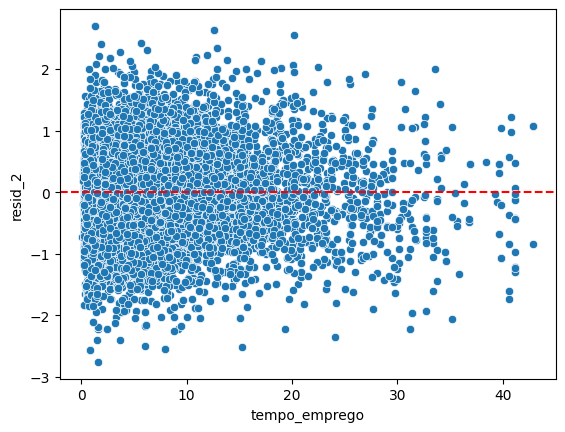

In [24]:
#Gráfico de Resíduo
df['resid_2'] = reg_renda.resid
sns.scatterplot(x='tempo_emprego', y='resid_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

#R²
df['pred_renda'] = np.exp(reg_renda.predict())
R2 = df['pred_renda'].corr(df['renda'])**2
print(f'O R² é de {R2}')


5) Este modelo ficou melhor, pois obteve 36,5% contra 14,68% do item 1.